In [1]:
import nibabel as nib
from nilearn.plotting import plot_surf
from nilearn.plotting import plot_surf_stat_map
import matplotlib.pyplot as plt
from nilearn import datasets
from matplotlib.colors import ListedColormap
import numpy as np

load glasser annotation and roi dictionary

In [2]:
fsaverage = datasets.fetch_surf_fsaverage(mesh = 'fsaverage6')
lh_labels, lh_ctab, lh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/rh.HCP_MMP1.fsaverage6.annot')

rois = {"PHG": [126,155,127],  # ParaHippocampal Gyrus
        "V1": [1],             # Primary Visual
        "EVC": [4,5],          # Early Visual Cortex (V2 Second Visual Area, V3 Third Visual Area)
        "V4": [6],             # Fourth Visual Area
        "SM": [8,9],           # primary motor, somato motor
        "MT/MST": [2,23],      # Medial Superior Temporal Area, Middle Temporal Area
        "RSC": [14],           # Retrosplenial
        "LO": [20,21,159,156], # Lateral Occipital
        "FFC": [18],           # Fusiform 
        "PIT": [22],           # Posterior Inferior Temporal
        "STV": [28],           # Superior Temporal Visual Area
        # intraparietal
        # premotor
        }

In [3]:
# function for plotting roi on a 1 row/6 column figure
# NOTE: left and right hemi annotations differ. 
# Here, we plot them  separately
def plot_roi(lh_roi_map, rh_roi_map, roi_name, cmap):
    # align = os.path.basename(gii_dir)
    figure, axes = plt.subplots(
        1, 6, subplot_kw={'projection': '3d'}, figsize=(20, 30))

    plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                       bg_map=fsaverage['sulc_left'],
                       title=f'{roi_name} lateral lh', 
                       hemi='left', view='lateral', cmap=cmap, axes=axes[0], colorbar=False)  # vmin=.05, vmax=.5,
    plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                       bg_map=fsaverage['sulc_right'],
                       title=f'{roi_name} lateral rh', 
                       hemi='right', view='lateral', cmap=cmap, axes=axes[1], colorbar=False)  # vmin=.05, vmax=.5,

    plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                       bg_map=fsaverage['sulc_left'],
                       title=f'{roi_name} medial lh', 
                       hemi='left', view='medial', cmap=cmap, axes=axes[2], colorbar=False)  # vmin=.05, vmax=.5,
    plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                       bg_map=fsaverage['sulc_right'],
                       title=f'{roi_name} medial rh', 
                       hemi='right', view='medial', cmap=cmap, axes=axes[3], colorbar=False)  # vmin=.05, vmax=.5,

    plot_surf_stat_map(fsaverage['infl_left'], lh_roi_map,
                       bg_map=fsaverage['sulc_left'],
                       title=f'{roi_name} ventral lh', 
                       hemi='left', view='ventral', cmap=cmap, axes=axes[4], colorbar=False)  # vmin=.05, vmax,=.5,
    plot_surf_stat_map(fsaverage['infl_right'], rh_roi_map,
                       bg_map=fsaverage['sulc_right'],
                       title=f'{roi_name} ventral rh', 
                       hemi='right', view='ventral', cmap=cmap, axes=axes[5], colorbar=False)  # vmin=.05, vmax=.5,

    plt.show()

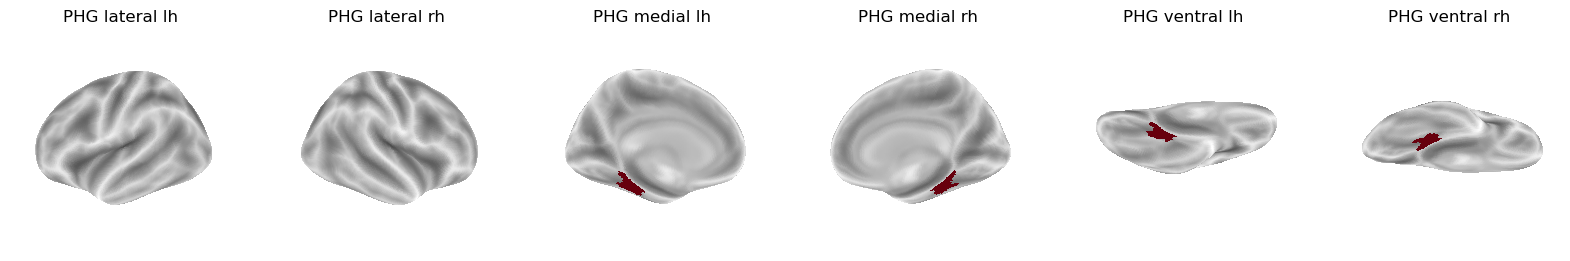

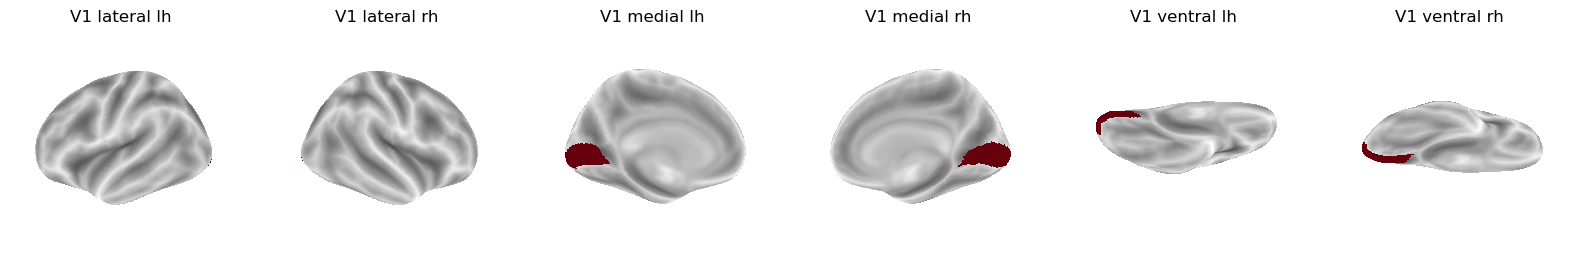

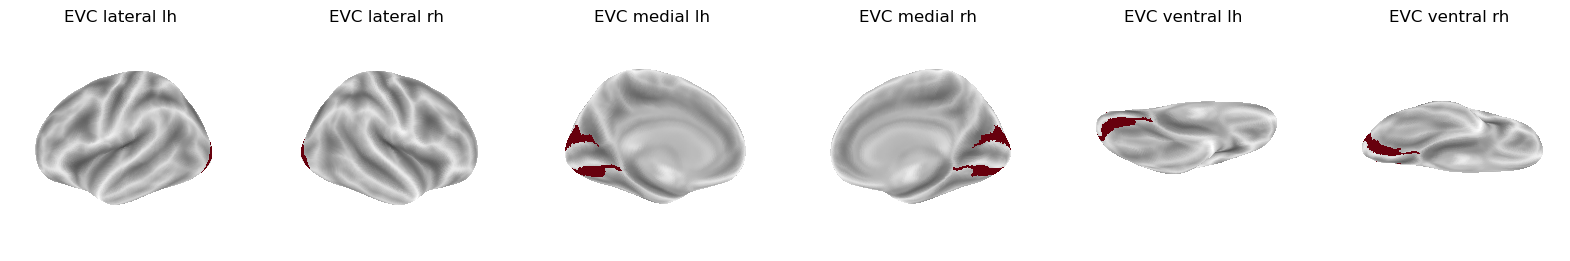

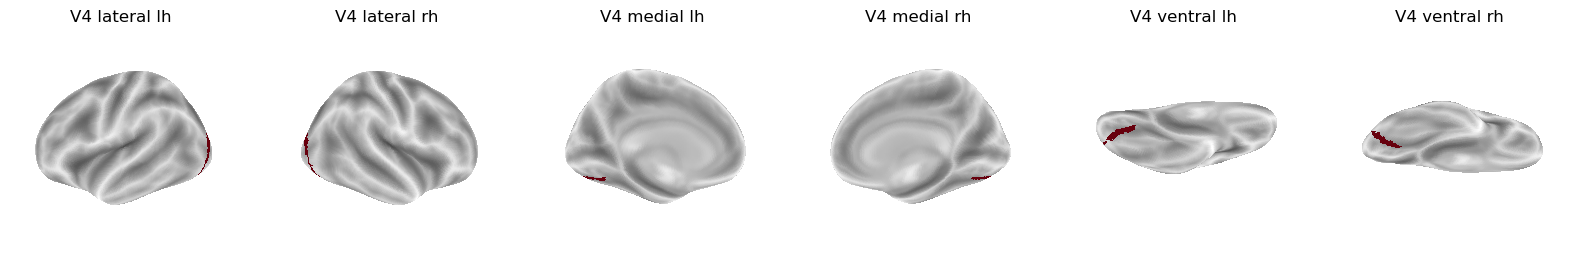

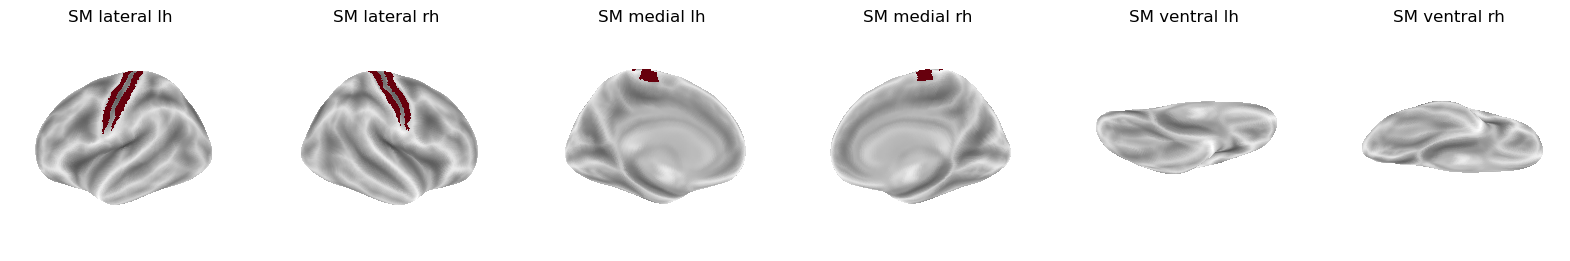

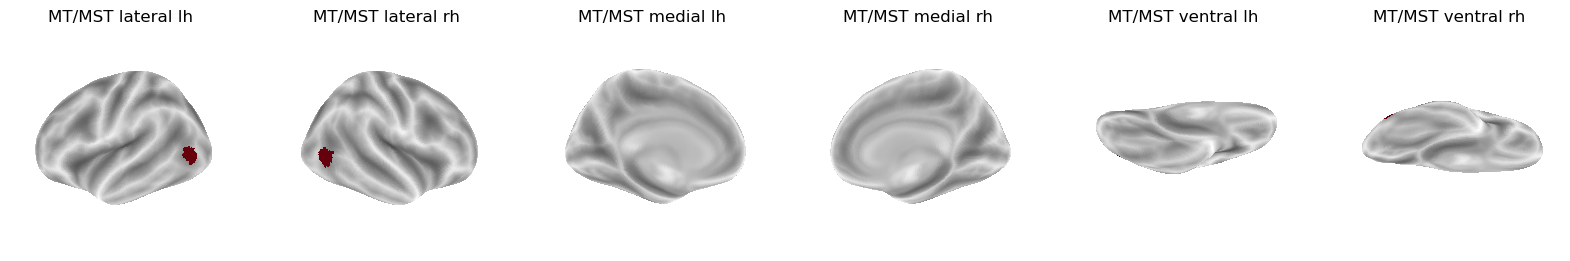

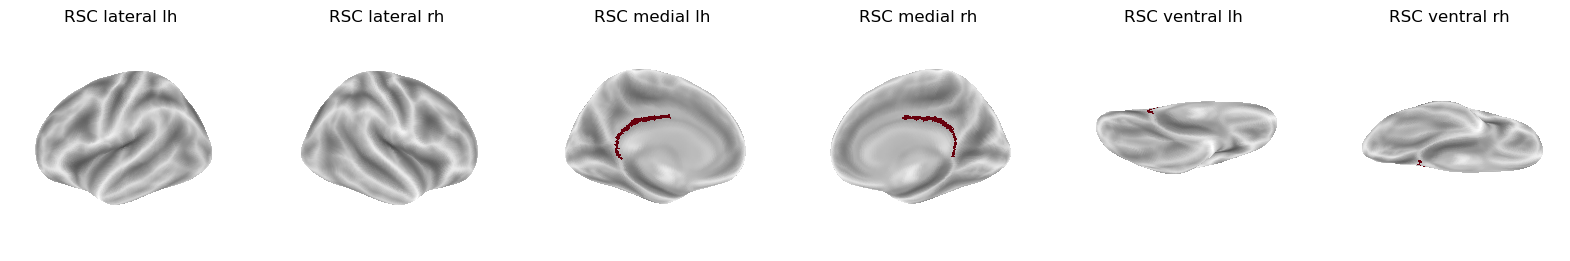

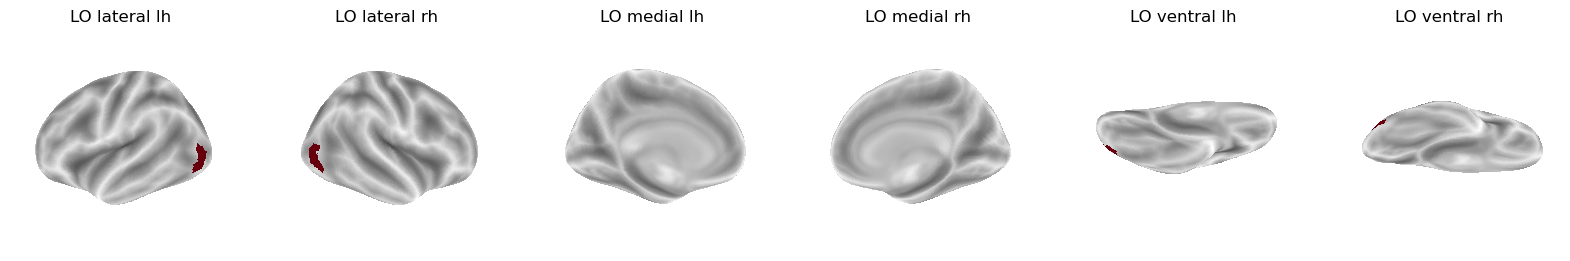

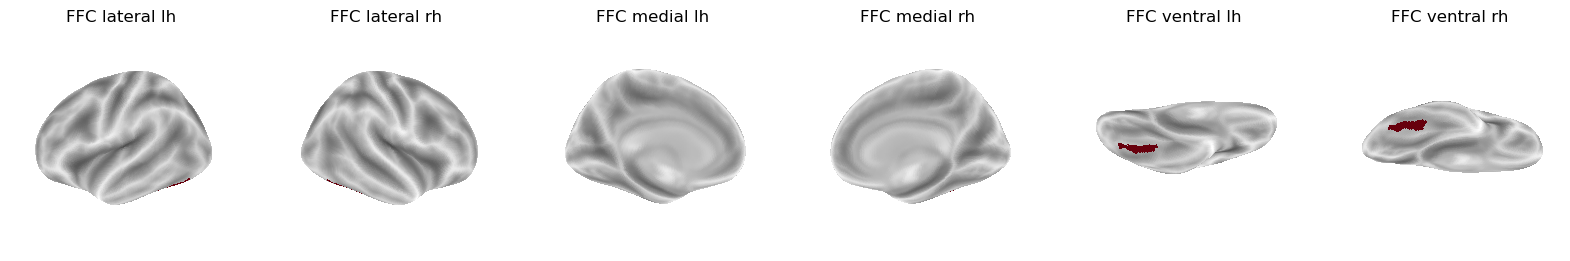

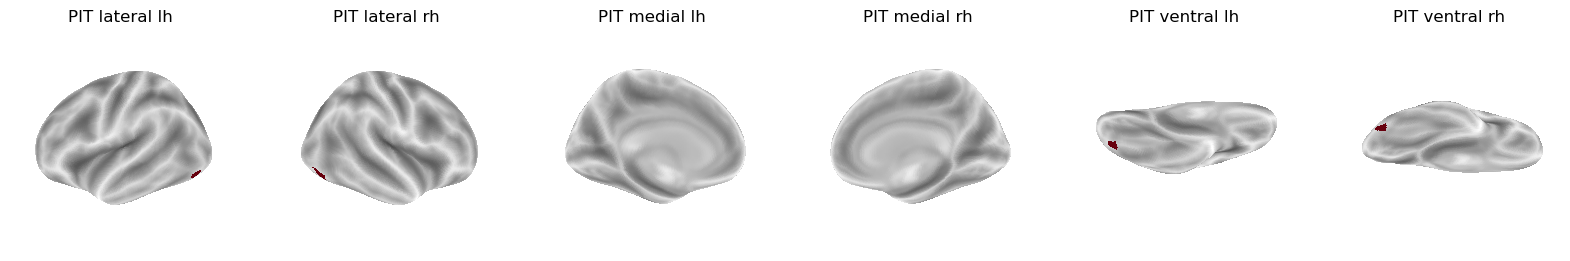

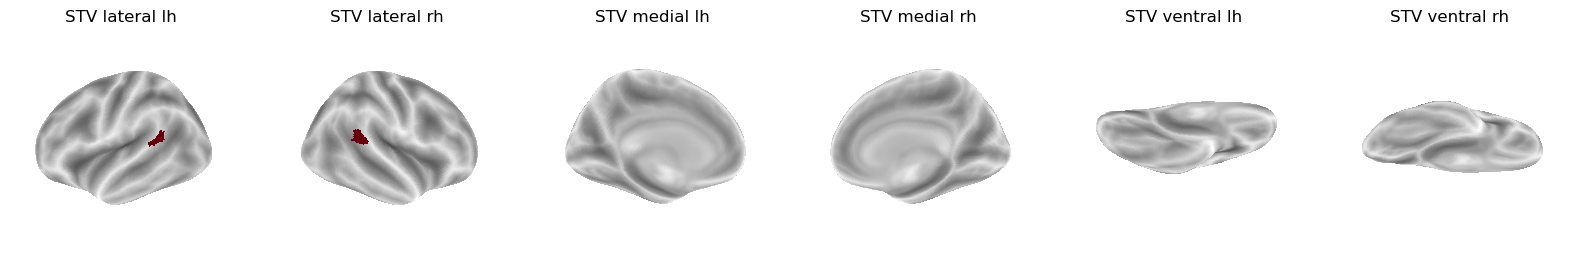

In [4]:
for roi_name in rois.keys():
    lh_roi_map = np.full(lh_labels.shape, np.nan)
    lh_roi_map[np.in1d(lh_labels, rois[roi_name])] = 1

    rh_roi_map = np.full(rh_labels.shape, np.nan)
    rh_roi_map[np.in1d(rh_labels, rois[roi_name])] = 1
    plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')
